# 7005_Group10_Presentation_27.11.2024

In [1]:
pip install plotly kaleido

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas wordcloud matplotlib seaborn sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [5]:
pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   --- ------------------------------------ 61.4/626.3 kB 1.7 MB/s eta 0:00:01
   ------------------------------ --------- 471.0/626.3 kB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install ipywidgets

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
import plotly.express as px
import requests
import nltk
import numpy as np
import matplotlib.ticker as mtick
import textblob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from scipy import stats
from textblob import TextBlob
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

url ="https://raw.githubusercontent.com/hkusda7005group10/groupdata/refs/heads/main/7005groupdata.csv"
df = pd.read_csv(url)

#DATA CLEANING
#Slect movie dataset
movies_df=df[df['type']=='MOVIE']

# Drop the useless columns 'id', 'type', and 'imbd_id'
movies_df = movies_df.drop(columns=['id', 'type', 'imdb_id'])

# Drop rows with missing values in all columns except 'age_certification'
movies_df= movies_df.dropna(subset=[col for col in movies_df.columns if col != 'age_certification'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ning\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
print(movies_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3388 entries, 0 to 5281
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3388 non-null   int64  
 1   title              3388 non-null   object 
 2   description        3388 non-null   object 
 3   release_year       3388 non-null   int64  
 4   age_certification  1318 non-null   object 
 5   runtime            3388 non-null   int64  
 6   imdb_score         3388 non-null   float64
 7   imdb_votes         3388 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 238.2+ KB
None


# Part_1_Release_Years

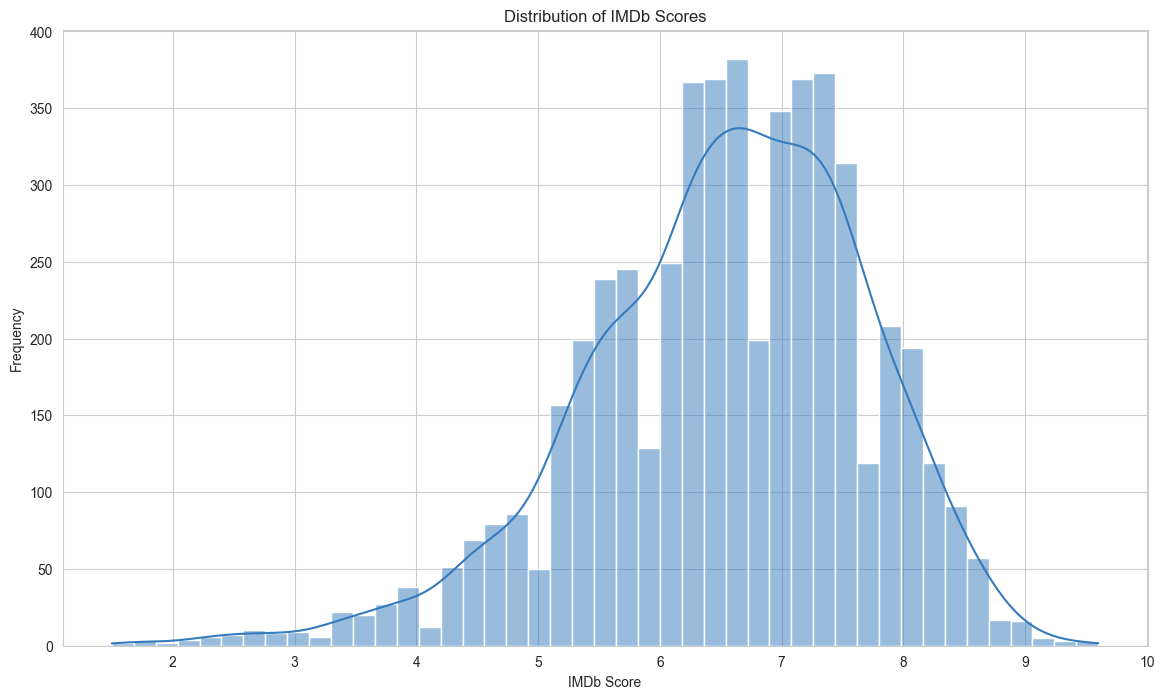

In [43]:
#Visualizing distribution of IMDb scores 
plt.figure(figsize=(14, 8))  

sns.histplot(df['imdb_score'], kde=True)
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Scores')
plt.show()

In [44]:
#Some statistics of the imdb_score_stats column, such as mean, median, standard difference, etc 
imdb_score_stats = movies_df['imdb_score'].describe()
print("statistics of the imdb_score_stats column:")
print(imdb_score_stats)

statistics of the imdb_score_stats column:
count    3388.000000
mean        6.266322
std         1.116509
min         1.500000
25%         5.600000
50%         6.400000
75%         7.100000
max         9.000000
Name: imdb_score, dtype: float64


In [45]:
#Check the number of films released in different years 
movies_per_year = movies_df['release_year'].value_counts().sort_index()
print("the number of films released:")
print(movies_per_year)

the number of films released:
release_year
1953      1
1954      2
1956      1
1958      1
1959      1
       ... 
2018    446
2019    466
2020    403
2021    406
2022     88
Name: count, Length: 66, dtype: int64


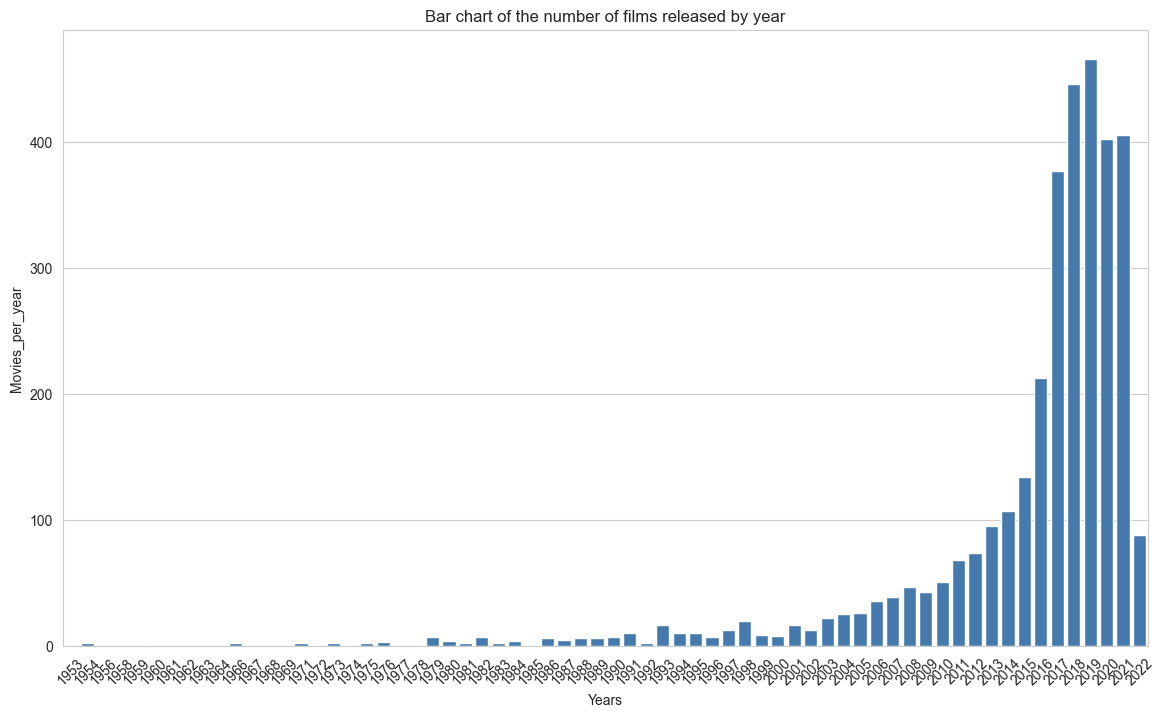

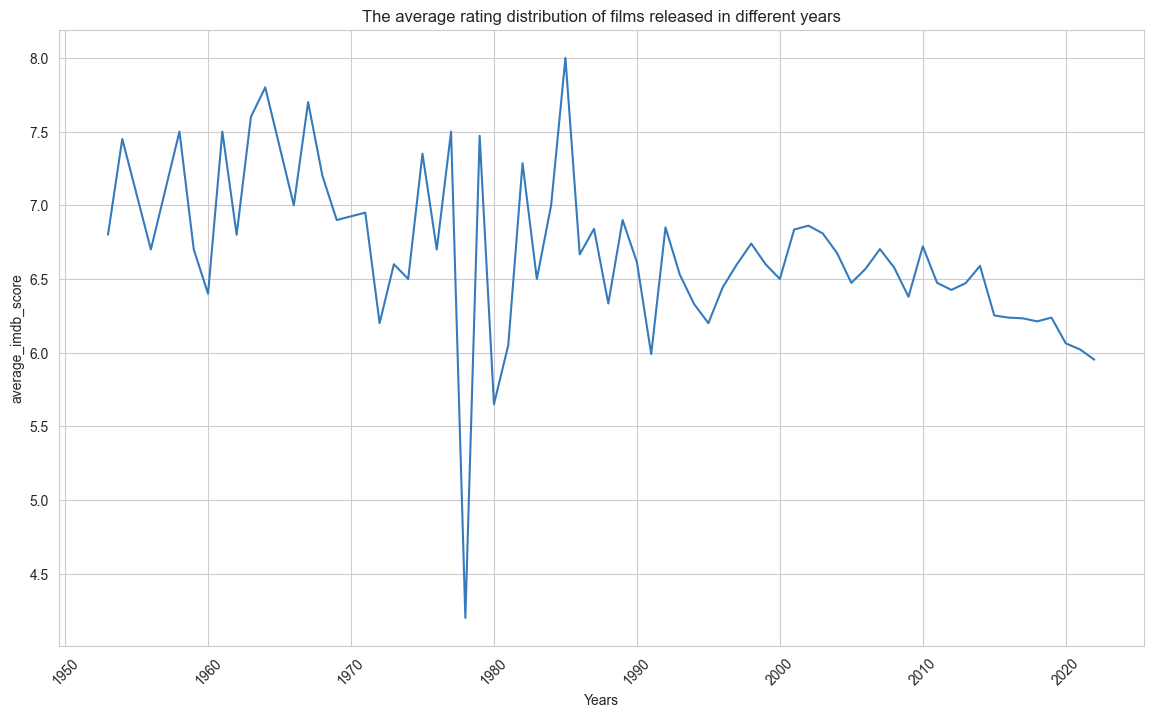

In [46]:
#Bar chart of the number of films released by year 
plt.figure(figsize=(14, 8))
sns.countplot(data=movies_df, x='release_year')
plt.title('Bar chart of the number of films released by year')
plt.xlabel('Years')
plt.ylabel('Movies_per_year')
plt.xticks(rotation=45)
plt.show()

#The average imdb score distribution of films released in different years 
average_scores_per_year = movies_df.groupby('release_year')['imdb_score'].mean()
plt.figure(figsize=(14, 8))
sns.lineplot(data=average_scores_per_year.reset_index(), x='release_year', y='imdb_score')
plt.title('The average rating distribution of films released in different years')
plt.xlabel('Years')
plt.ylabel('average_imdb_score')
plt.xticks(rotation=45)
plt.show()

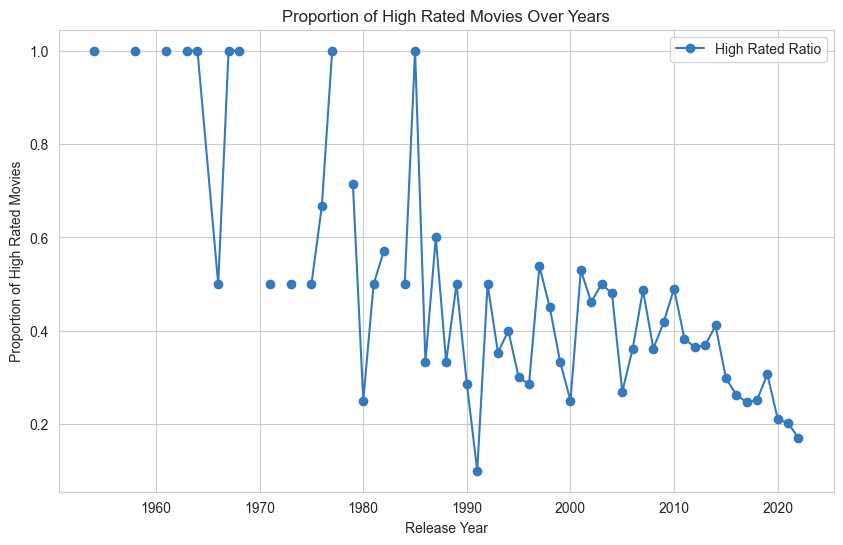

In [47]:
#Percentage of highly rated movies per year
high_rated_movies = movies_df[movies_df['imdb_score'] >= 7]
yearly_high_rated_count = high_rated_movies.groupby('release_year')['title'].count()
yearly_total_count = movies_df.groupby('release_year')['title'].count()
yearly_high_rated_ratio = yearly_high_rated_count / yearly_total_count


sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
yearly_high_rated_ratio.plot(ax=ax, marker='o', label='High Rated Ratio')
ax.set_title('Proportion of High Rated Movies Over Years')
ax.set_xlabel('Release Year')
ax.set_ylabel('Proportion of High Rated Movies')
ax.legend()
plt.show()

In [48]:
#Top3 every year
grouped = movies_df.groupby('release_year')
top_scores_per_year = grouped[movies_df.columns[1:]].apply(lambda x: x.nlargest(3, 'imdb_score')).reset_index(drop=True)

fig = px.bar(top_scores_per_year, x='imdb_score', y='title', color='release_year', 
             orientation='h', animation_frame='release_year', 
             title='Top IMDb Scores Over Time')
fig.update_layout(xaxis_title='IMDb Score', yaxis_title='Title')
fig.show()

# Part_2_Age_Certification

In [123]:
# filter "MOVIE" dataset
movies_df2 = df[df['type']=='MOVIE']

# Filter out the part desired values
ls = ["index", "title", "release_year", "age_certification", "imdb_score", "imdb_votes"]
movies_df2 = movies_df2[ls].reset_index(drop=True)

# Filter age_certification with nan values
movies_df2 = movies_df2.dropna(subset = ["age_certification"])
movies_df2

,index,title,release_year,age_certification,imdb_score,imdb_votes
0,0,Taxi Driver,1976,R,8.3,795222.0
1,1,Monty Python and the Holy Grail,1975,PG,8.2,530877.0
2,2,Life of Brian,1979,R,8.0,392419.0
3,3,The Exorcist,1973,R,8.1,391942.0
4,5,Dirty Harry,1971,R,7.7,153463.0
...,...,...,...,...,...,...
3338,5196,Prime Time,2021,R,5.2,1757.0
3342,5202,Thalaivii,2021,G,5.9,30439.0
3347,5207,Convergence: Courage in a Crisis,2021,R,5.4,252.0
3349,5211,AngÃ¨le,2021,R,7.0,493.0


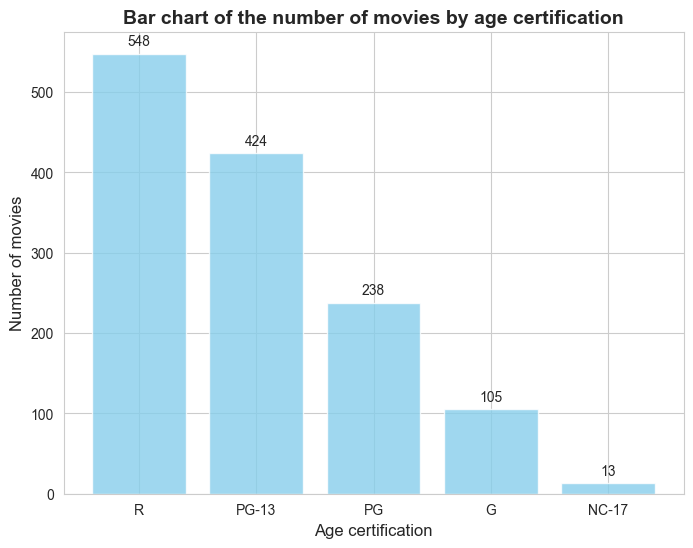

In [ ]:
# Count the number of movies for each age certification
age_cert_counts = movies_df2['age_certification'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(age_cert_counts.index, age_cert_counts.values, color='skyblue', alpha=0.8)

# Add title and labels
plt.title('Bar chart of the number of movies by age certification', fontsize=14, fontweight='bold')
plt.xlabel('Age certification', fontsize=12)
plt.ylabel('Number of movies', fontsize=12)

# Display specific counts above each bar
for i, count in enumerate(age_cert_counts.values):
    plt.text(i, count + 10, str(count), ha='center', fontsize=10)

plt.show()

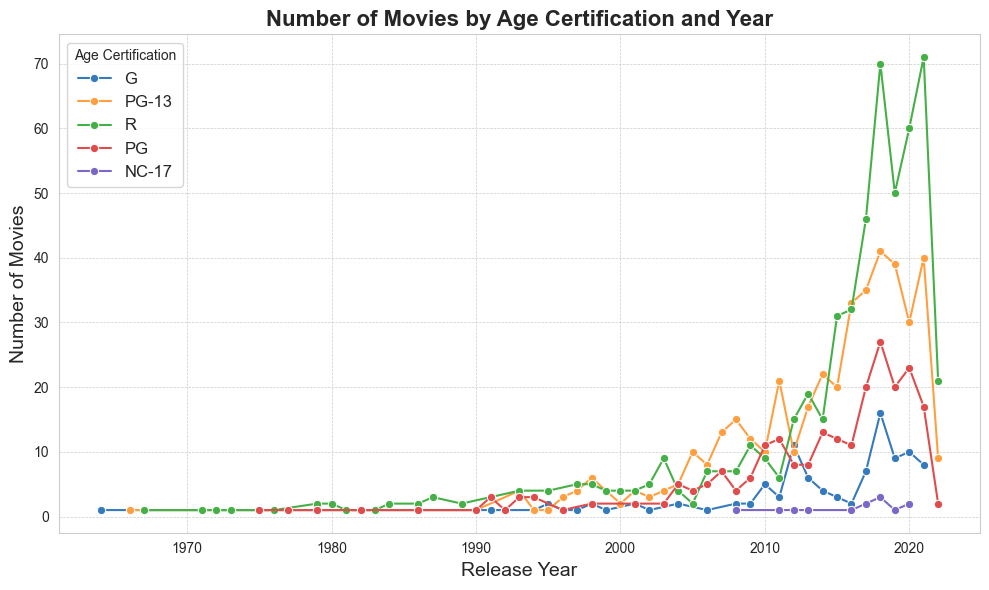

In [138]:
# Calculate the number of movies by age certification in each year
movies_df3 = movies_df2.groupby(["release_year", "age_certification"]).size().reset_index(name='count')

# Define a custom color palette that is slightly darker but not too dark
custom_palette = ["#357ABD", "#FF9F40", "#45B046", "#E04B4B", "#7A67C8"]
sns.set_palette(custom_palette)

# Plot Line Charts with seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(data=movies_df3, x="release_year", y="count", hue="age_certification", marker="o")

# Add title and axis labels
plt.title('Number of Movies by Age Certification and Year', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

# Add a legend
plt.legend(title='Age Certification', fontsize=12)

# Show grid lines
plt.grid(True, linestyle='--', linewidth=0.5)

# Rotate the x-axis labels for better display
plt.xticks()

# Plot the figure
plt.tight_layout()  # Automatically adjust subplot parameters to fill the entire figure
plt.show()

In [162]:
# Filter out highly rated movies (on a scale of 7)
high_rated_movies = movies_df2[movies_df2['imdb_score' ] >= 7]
high_rated_movies

,index,title,release_year,age_certification,imdb_score,imdb_votes,high_score
0,0,Taxi Driver,1976,R,8.3,795222.0,True
1,1,Monty Python and the Holy Grail,1975,PG,8.2,530877.0,True
2,2,Life of Brian,1979,R,8.0,392419.0,True
3,3,The Exorcist,1973,R,8.1,391942.0,True
4,5,Dirty Harry,1971,R,7.7,153463.0,True
...,...,...,...,...,...,...,...
3202,5003,A Family,2021,R,7.0,2158.0,True
3262,5093,Puff: Wonders of the Reef,2021,PG,7.1,743.0,True
3285,5129,Headspace Unwind you Mind,2021,G,7.2,132.0,True
3332,5188,Johnny Test's Ultimate Meatloaf Quest,2021,G,7.0,24.0,True


In [163]:
# Interactive charts
# For very dense data, using interactive charts allows the user to zoom and pan to view detailed information.
# !pip install plotly

movies_df4 = high_rated_movies.groupby(["age_certification", "release_year"])["age_certification"].count().reset_index(name="high_rated_score_count")

fig = px.bar(movies_df4, x='release_year', y='high_rated_score_count', color='age_certification',
             labels={'high_rated_score_count': 'High IMDb Scores Count'},
             title='Number of High IMDb Scores by Age certification and Year')
fig.show()

In [164]:
#Part_2_1 Calculation of the base figure (total number of films) and film ratio for each category

# Initialize the high_score column
movies_df2['high_score'] = movies_df2['imdb_score'] >= 7

# Group by age_certification to calculate the total number of movies
age_cert_total = movies_df2.groupby('age_certification').size().reset_index(name='total_movies')

# Calculate the proportion of high scores
age_cert_proportion = movies_df2.groupby('age_certification')['high_score'].mean().reset_index()

# Merge the total number of movies and the proportion of high scores
age_cert_summary = pd.merge(age_cert_proportion, age_cert_total, on='age_certification')
age_cert_summary.rename(columns={'high_score': 'proportion_high_scores'}, inplace=True)

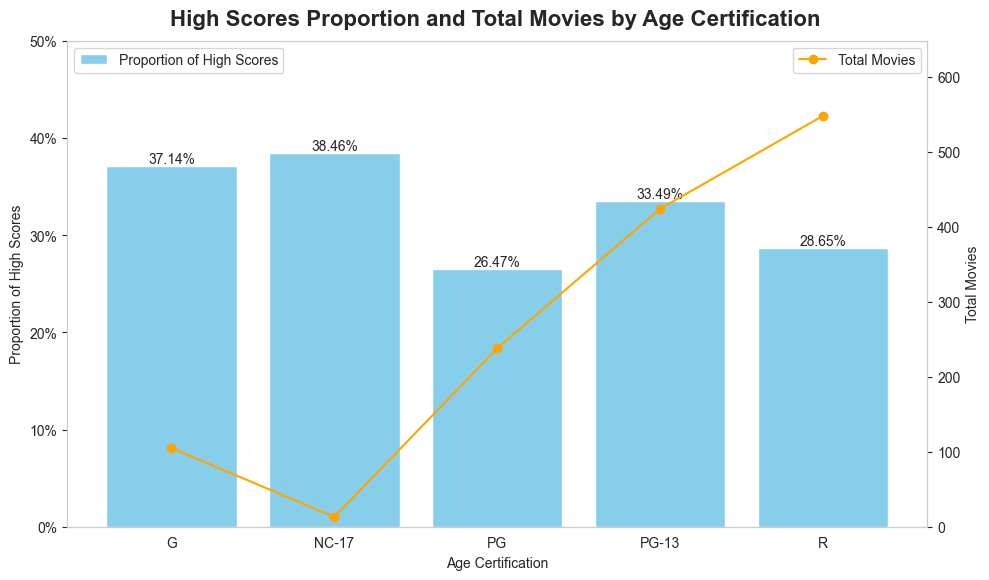

In [165]:
#Part_2_2 Visualization: combining ratios and bases

# Bar graph: proportion of highly rated movies graded vs. total movies
# Create a bar chart with dual axes to display proportions and counts
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the proportion of high scores (left axis)
bars = ax1.bar(age_cert_summary['age_certification'], age_cert_summary['proportion_high_scores'], color='skyblue', label='Proportion of High Scores')
ax1.set_ylabel('Proportion of High Scores')
ax1.set_ylim(0, 0.5)  # Set range for the proportion
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # Format y-axis as percentages

# Display percentage values above each bar
for bar in bars:
    bar_x = bar.get_x() + bar.get_width() / 2  # Get the x-coordinate of the bar's center
    bar_y = bar.get_height()  # Get the bar's height (y value)
    ax1.text(bar_x, bar_y, f"{bar_y:.2%}", ha='center', va='bottom', fontsize=10)  # Add percentage value

# Plot the total number of movies (right axis)
ax2 = ax1.twinx()
ax2.plot(age_cert_summary['age_certification'], age_cert_summary['total_movies'], color='orange', marker='o', label='Total Movies')
ax2.set_ylabel('Total Movies')
ax2.set_ylim(0, age_cert_summary['total_movies'].max() + 100)  # Set range for the total count

# Add title and legends
fig.suptitle('High Scores Proportion and Total Movies by Age Certification', 
             fontsize=16, fontweight='bold', y=0.96)  # Adjust y to control space
ax1.set_xlabel('Age Certification')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid(False) # disable left y-axis grid
ax2.grid(False) # disable right y-axis grid

# Display the plot
plt.tight_layout()
plt.show()

# Part_3_Runtime

C:\Users\Ning\AppData\Local\Temp\ipykernel_18972\2355016291.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




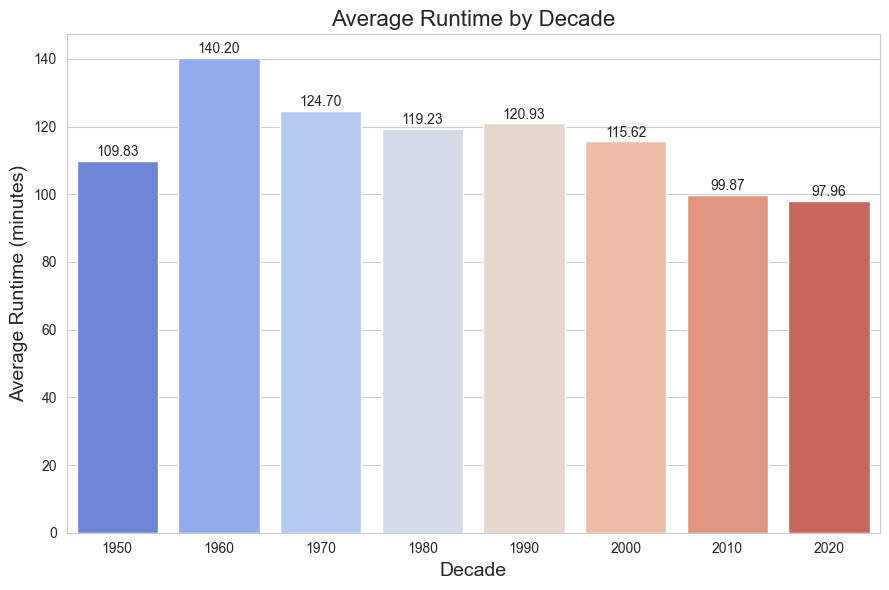

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))  # 或 simply `plt.subplots(figsize=(9, 6))`
movies_df['decade'] = (movies_df['release_year'] // 10) * 10
avg_runtime_by_decade = movies_df.groupby('decade')['runtime'].mean().reset_index()
sns.barplot(ax=ax, x='decade', y='runtime', data=avg_runtime_by_decade, palette='coolwarm')
ax.set_title('Average Runtime by Decade', fontsize=16)
ax.set_xlabel('Decade', fontsize=14)
ax.set_ylabel('Average Runtime (minutes)', fontsize=14)
for i in range(len(avg_runtime_by_decade)):
    ax.text(
        x=i, 
        y=avg_runtime_by_decade['runtime'][i] + 0.5,  
        s=f"{avg_runtime_by_decade['runtime'][i]:.2f}", 
        ha='center', 
        va='bottom', 
        fontsize=10
    )
plt.tight_layout()
plt.show()

C:\Users\Ning\AppData\Local\Temp\ipykernel_18972\3063885982.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Ning\AppData\Local\Temp\ipykernel_18972\3063885982.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




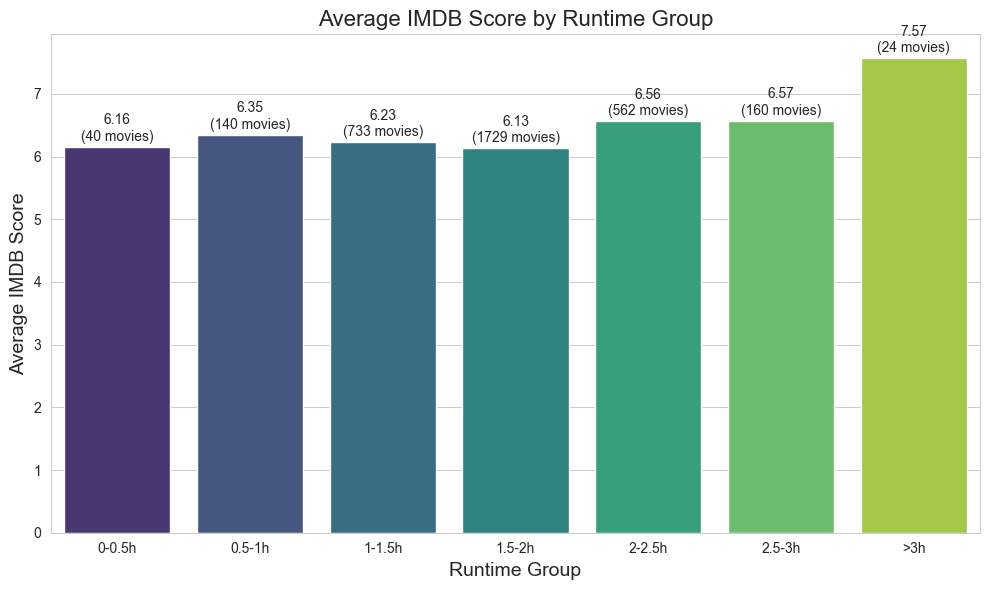

In [167]:
# Define runtime intervals (in minutes)
bins = [0, 30, 60, 90, 120, 150, 180, float('inf')]# Intervals for grouping runtime
labels = ['0-0.5h', '0.5-1h', '1-1.5h', '1.5-2h', '2-2.5h', '2.5-3h', '>3h'] # Labels for each interval

# Categorize the 'runtime' column into the defined intervals
movies_df['runtime_group'] = pd.cut(movies_df['runtime'], bins=bins, labels=labels, right=False)

# Group the data by runtime_group and calculate the average IMDb score and the number of movies in each group
avg_score_by_runtime_group = movies_df.groupby('runtime_group').agg(
    imdb_score=('imdb_score', 'mean'),# Calculate the mean IMDb score for each group
    movie_count=('runtime', 'size')# Count the number of movies in each group
).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(
    x='runtime_group', 
    y='imdb_score', 
    data=avg_score_by_runtime_group, 
    palette='viridis', 
    ax=ax
)

# Annotate each bar with the average IMDb score and the number of movies
for i in range(len(avg_score_by_runtime_group)):
    avg_score = avg_score_by_runtime_group['imdb_score'][i]
    movie_count = avg_score_by_runtime_group['movie_count'][i]
    ax.text(
        x=i,  
        y=avg_score + 0.05,  
        s=f"{avg_score:.2f}\n({movie_count} movies)",  
        ha='center',  
        va='bottom', 
        fontsize=10  
    )

ax.set_title('Average IMDB Score by Runtime Group', fontsize=16)
ax.set_xlabel('Runtime Group', fontsize=14)
ax.set_ylabel('Average IMDB Score', fontsize=14)

plt.tight_layout()
plt.show()

C:\Users\Ning\AppData\Local\Temp\ipykernel_18972\3489142675.py:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Ning\AppData\Local\Temp\ipykernel_18972\3489142675.py:17: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




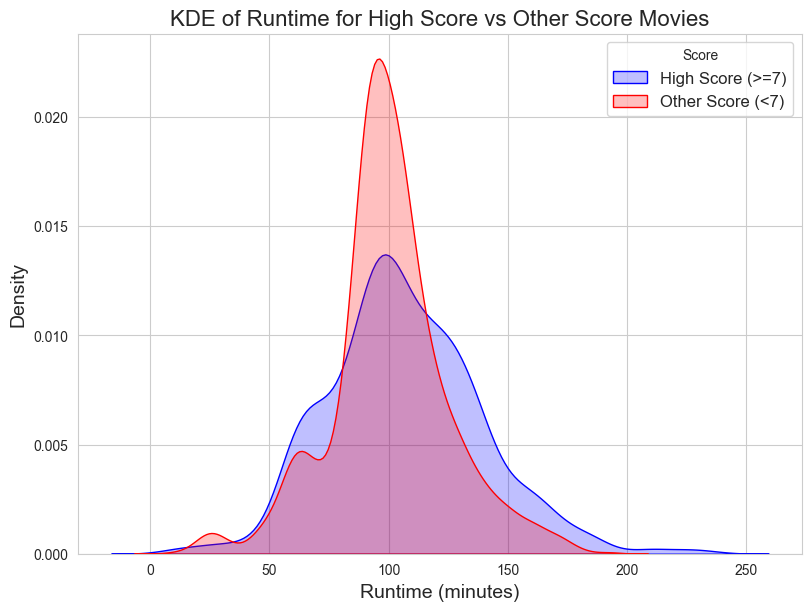

In [168]:
# runtime和score的密度分布

# Create a new column 'High_score' based on the values of 'imdb_score'
movies_df['High_score'] = movies_df['imdb_score'].apply(lambda x: 'yes' if x >= 7 else 'no')

fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)

# Create a figure and axis for the plot with specified size and layout constraints
sns.kdeplot(
    data=movies_df[movies_df['High_score'] == 'yes'], 
    x='runtime', 
    label='High Score (>=7)', 
    shade=True, 
    color='blue', 
    ax=ax
)
sns.kdeplot(
    data=movies_df[movies_df['High_score'] == 'no'], 
    x='runtime', 
    label='Other Score (<7)', 
    shade=True, 
    color='red', 
    ax=ax
)

ax.set_xlabel('Runtime (minutes)', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.set_title('KDE of Runtime for High Score vs Other Score Movies', fontsize=16)
ax.legend(title='Score', fontsize=12)

plt.show()

# Part_4_Votes

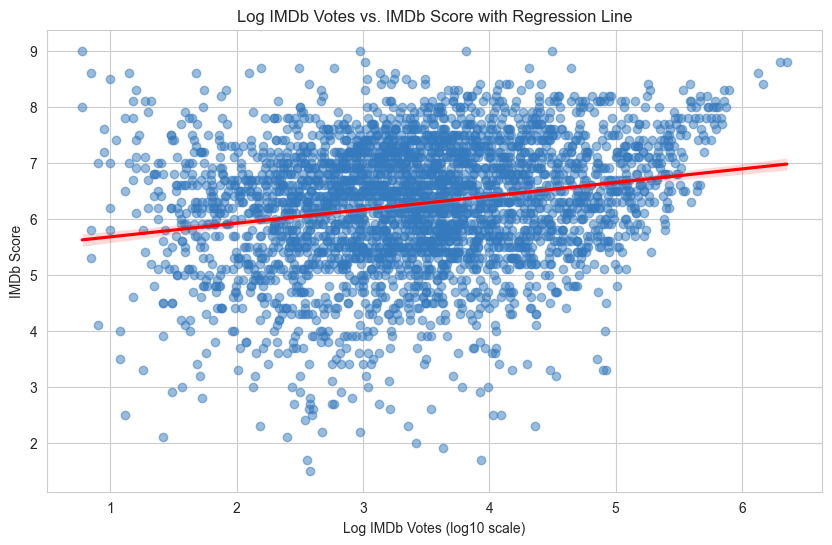

In [169]:
# Create a new DataFrame for regression analysis to avoid modifying the original data
df_regression = movies_df.copy()

# Apply log10 transformation to the 'imdb_votes' column, adding 1 to avoid log(0),and create a new column 'log_imdb_votes' to store the transformed values
df_regression['log_imdb_votes'] = np.log10(df_regression['imdb_votes'] + 1)

plt.figure(figsize=(10, 6))
sns.regplot(data=df_regression, x='log_imdb_votes', y='imdb_score', scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Log IMDb Votes vs. IMDb Score with Regression Line')
plt.xlabel('Log IMDb Votes (log10 scale)')
plt.ylabel('IMDb Score')
plt.show()

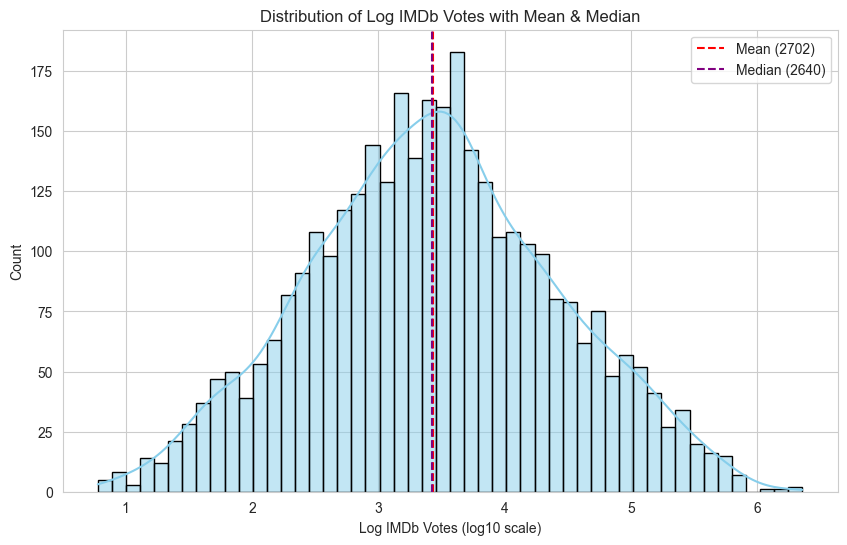

In [170]:
df_distribution = movies_df.copy()
# Log-transform IMDb votes and calculate the mean and median
df_distribution['log_imdb_votes'] = np.log10(df_distribution['imdb_votes'] + 1)  # Add 1 to handle potential zero votes
mean_log_votes = df_distribution['log_imdb_votes'].mean()
median_log_votes = df_distribution['log_imdb_votes'].median()

# Plot the distribution of log-transformed IMDb votes
plt.figure(figsize=(10, 6))
sns.histplot(df_distribution['log_imdb_votes'], bins=50, kde=True, color='skyblue', edgecolor='black')

# Annotate the mean and median
plt.axvline(mean_log_votes, color='red', linestyle='--', label=f'Mean ({10**mean_log_votes-1:.0f})')  # Convert back to original scale
plt.axvline(median_log_votes, color='purple', linestyle='--', label=f'Median ({10**median_log_votes-1:.0f})')  # Convert back to original scale

# Add title, labels, and legend
plt.title('Distribution of Log IMDb Votes with Mean & Median')
plt.xlabel('Log IMDb Votes (log10 scale)')
plt.ylabel('Count')
plt.legend()

# Display the plot
plt.show()

C:\Users\Ning\AppData\Local\Temp\ipykernel_18972\3025510093.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



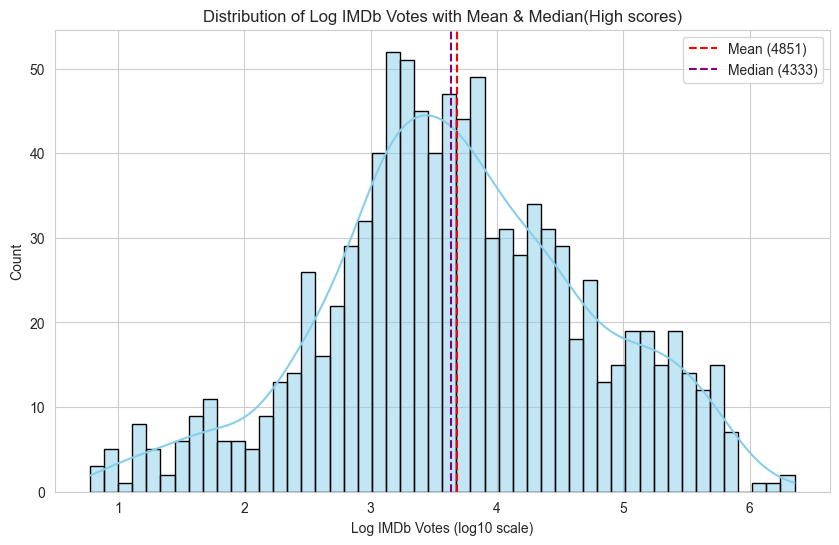

In [171]:
# Create a DataFrame for high-rated movies
high_rated_movies = movies_df[movies_df['imdb_score' ] >= 7]
high_rated_movies['log_imdb_votes'] = np.log10(high_rated_movies['imdb_votes'] + 1)

# Calculate the mean and median of log-transformed IMDb votes
mean_votes1 = high_rated_movies['log_imdb_votes'].mean()
median_votes1 = high_rated_movies['log_imdb_votes'].median()

# Plot the distribution of log-transformed IMDb votes
plt.figure(figsize=(10, 6))
sns.histplot(high_rated_movies['log_imdb_votes'], bins=50, kde=True, color='skyblue', edgecolor='black')

# Annotate the mean and median
plt.axvline(mean_votes1, color='red', linestyle='--', label=f'Mean ({10**mean_votes1-1:.0f})')   # Convert log-transformed mean back to original scale
plt.axvline(median_votes1, color='purple', linestyle='--', label=f'Median ({10**median_votes1-1:.0f})')  

plt.title('Distribution of Log IMDb Votes with Mean & Median(High scores)')
plt.xlabel('Log IMDb Votes (log10 scale)')
plt.ylabel('Count')
plt.legend()

plt.show()

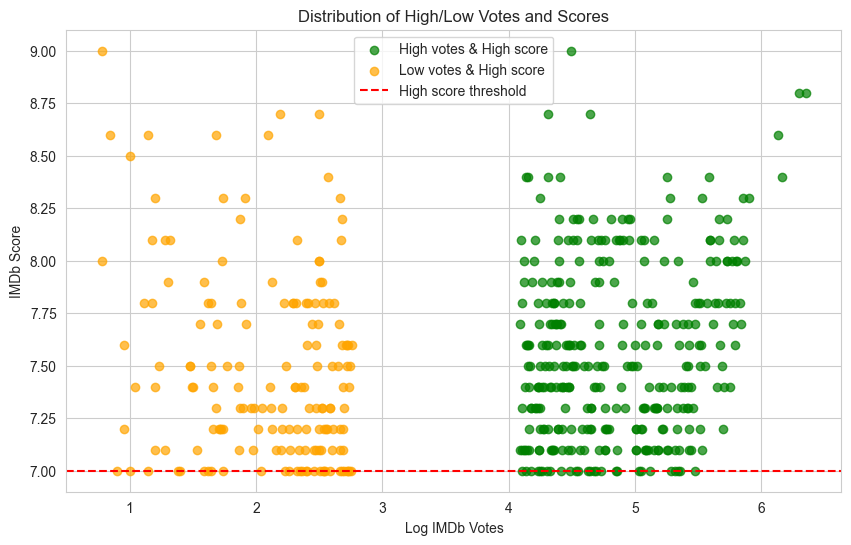

In [172]:
df_new = movies_df.copy()
df_new['log_votes'] = np.log10(df_new['imdb_votes'] + 1)

# Calculate the 75th percentile (upper quartile) for IMDb votes
votes_threshold_high = df_new['imdb_votes'].quantile(0.75) 

# Calculate the 25th percentile (lower quartile) for IMDb votes
votes_threshold_low = df_new['imdb_votes'].quantile(0.25)   # 下四分位数
score_threshold_high = 7  

# Filter movies with high votes and high scores
high_votes_high_score = df_new[(df_new['imdb_votes'] >= votes_threshold_high) & 
                           (df_new['imdb_score'] >= score_threshold_high)]

# Filter movies with low votes but high scores (niche high-rated movies)
low_votes_high_score = df_new[(df_new['imdb_votes'] <= votes_threshold_low) & 
                          (df_new['imdb_score'] >= score_threshold_high)]


plt.figure(figsize=(10, 6))
plt.scatter(high_votes_high_score['log_votes'], high_votes_high_score['imdb_score'], 
            label='High votes & High score', alpha=0.7, color='green')
plt.scatter(low_votes_high_score['log_votes'], low_votes_high_score['imdb_score'], 
            label='Low votes & High score', alpha=0.7, color='orange')
plt.axhline(score_threshold_high, color='red', linestyle='--', label='High score threshold')
plt.xlabel('Log IMDb Votes')
plt.ylabel('IMDb Score')
plt.legend()
plt.title('Distribution of High/Low Votes and Scores')
plt.show()

# Part_5_Contents

In [173]:
high_rated_movies = df[df['imdb_score' ] >= 7]
titles = high_rated_movies['title'].astype(str).tolist()

vectorizer = CountVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(titles)
feature_names = vectorizer.get_feature_names_out()
word_freq = X.toarray().sum(axis=0)
word_freq_dict = dict(zip(feature_names, word_freq))
wordcloud = WordCloud(width=800, height=400, background_color='white', max_font_size=100, max_words=50).generate_from_frequencies(word_freq_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 50 Words in High-Rated Movie Titles')
plt.show()

NameError: name 'CountVectorizer' is not defined

In [ ]:
word_scores = {}
for word in feature_names:
    movies_with_word = high_rated_movies[high_rated_movies['title'].str.contains(word, case=False, na=False)]
    if not movies_with_word.empty:
        word_scores[word] = movies_with_word['imdb_score'].mean()

word_data = pd.DataFrame.from_dict(word_scores, orient='index', columns=['Average Score'])
word_data['Word Frequency'] = word_freq

correlation = word_data['Word Frequency'].corr(word_data['Average Score'])
print(f'Pearson Correlation between Word Frequency and Average Score: {correlation:.2f}')

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Word Frequency', y='Average Score', data=word_data)
plt.title('Word Frequency vs Average IMDB Score (for Demonstration Purposes Only)')
plt.xlabel('Word Frequency')
plt.ylabel('Average IMDB Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
target_word = 'love'
df['contains_target_word'] = df['title'].str.contains(target_word, case=False, na=False)
movies_with_target_word = df[df['contains_target_word']]
average_score_with_target_word = movies_with_target_word['imdb_score'].mean()
average_score_all_movies = df['imdb_score'].mean()
print(f'Average IMDB score for movies with "{target_word}" in the title: {average_score_with_target_word:.2f}')
print(f'Average IMDB score for all movies: {average_score_all_movies:.2f}')


t_stat, p_value = stats.ttest_ind(
    movies_with_target_word['imdb_score'],
    df[~df['contains_target_word']]['imdb_score'],
    equal_var=False  
)

print(f'T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}')

significance_level = 0.05
if p_value < significance_level:
    print(f'There is a statistically significant difference between the IMDB scores of movies with and without "{target_word}" in the title.')
else:
    print(f'There is no statistically significant difference between the IMDB scores of movies with and without "{target_word}" in the title.')

plt.figure(figsize=(12, 6))
sns.histplot(df[~df['contains_target_word']]['imdb_score'], bins=20, label='Movies without "Love"', kde=True)
sns.histplot(movies_with_target_word['imdb_score'], bins=20, label='Movies with "Love"', kde=True, alpha=0.7)
plt.title(f'IMDB Score Distribution for Movies with and without "{target_word}" in the Title')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
df['description'] = df['description'].astype(str)
def calculate_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment_polarity'] = df['description'].apply(calculate_sentiment)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment_polarity', y='imdb_score', data=df, alpha=0.6)
plt.title('Sentiment Polarity vs. IMDB Score')
plt.xlabel('Sentiment Polarity')
plt.ylabel('IMDB Score')
plt.show()

correlation_coefficient = df['sentiment_polarity'].corr(df['imdb_score'])
print(f'Correlation between sentiment polarity and IMDB score: {correlation_coefficient:.2f}')

pearson_corr, p_value = stats.pearsonr(df['sentiment_polarity'], df['imdb_score'])
print(f'Pearson correlation coefficient: {pearson_corr:.2f}, P-value: {p_value:.4f}')

significance_level = 0.05
if p_value < significance_level:
    print(f'There is a statistically significant correlation between sentiment polarity and IMDB score.')
else:
    print(f'There is no statistically significant correlation between sentiment polarity and IMDB score.')

In [ ]:
df['description'] = df['description'].astype(str)
high_rated_movies = df[df['imdb_score'] >= 7]

def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'[^a-z\s]', '', text) 
    words = word_tokenize(text)  
    stop_words = set(stopwords.words('english')) 
    words = [word for word in words if word not in stop_words] 
    return words

processed_descriptions = high_rated_movies['description'].apply(preprocess_text)
all_words = [word for desc in processed_descriptions for word in desc]
word_counts = Counter(all_words)

print("Top 50 most frequent words:")
print(word_counts.most_common(50))

In [ ]:
word_freq = {
    'life':  353, 
    'world': 244, 
    'one': 218,
    'new': 209, 
    'family': 200, 
    'love': 195,
    'story': 194,
    'young': 192,
    'year': 178,
    'two': 176, 
    'series': 162,
    'man': 141,
    'lives': 140,
    'school': 135,
    'friends': 132,
    'find': 113,
    'time': 104,
    'people': 102,
    'first': 99,
    'home': 95,
    'father': 93,
    'become': 89,
    'woman': 89,
    'special': 89,
    'war': 88,
    'way': 87,
    'back': 87,
    'three': 85,
    'takes': 84,
    'together': 83,
    'set': 82,
    'comedy': 79,
    ' documentary': 79,
    'must': 78,
    'get': 77,
    'city': 76,
    'best': 76,
    'journey': 76,
    'show': 74, 
    'film': 74,
    'stories': 74,
    'group': 74,
    'high': 73,
    'help': 73,
    'true': 73,
    'finds': 72,
    'girl': 71,
    'follows':71,
    'death':70
}

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      min_font_size=10).generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

In [ ]:
target_word = 'life'
df['contains_target_word'] = df['description'].str.contains(target_word, case=False, na=False)
movies_with_target_word = df[df['contains_target_word']]
average_score_with_target_word = movies_with_target_word['imdb_score'].mean()
average_score_all_movies = df['imdb_score'].mean()

print(f'Average IMDB score for movies with "{target_word}" in the title: {average_score_with_target_word:.2f}')
print(f'Average IMDB score for all movies: {average_score_all_movies:.2f}')

t_stat, p_value = stats.ttest_ind(
    movies_with_target_word['imdb_score'],
    df[~df['contains_target_word']]['imdb_score'],
    equal_var=False  # 由于样本量可能不同，这里使用Welch's t-test
)

print(f'T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}')
significance_level = 0.05
if p_value < significance_level:
    print(f'There is a statistically significant difference between the IMDB scores of movies with and without "{target_word}" in the title.')
else:
    print(f'There is no statistically significant difference between the IMDB scores of movies with and without "{target_word}" in the title.')

plt.figure(figsize=(12, 6))
sns.histplot(df[~df['contains_target_word']]['imdb_score'], bins=20, label='Movies without "life"', kde=True)
sns.histplot(movies_with_target_word['imdb_score'], bins=20, label='Movies with "life"', kde=True, alpha=0.7)
plt.title(f'IMDB Score Distribution for Movies with and without "{target_word}" in the Title')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
target_word = 'world'
df['contains_target_word'] = df['description'].str.contains(target_word, case=False, na=False)
movies_with_target_word = df[df['contains_target_word']]
average_score_with_target_word = movies_with_target_word['imdb_score'].mean()
average_score_all_movies = df['imdb_score'].mean()

print(f'Average IMDB score for movies with "{target_word}" in the title: {average_score_with_target_word:.2f}')
print(f'Average IMDB score for all movies: {average_score_all_movies:.2f}')

t_stat, p_value = stats.ttest_ind(
    movies_with_target_word['imdb_score'],
    df[~df['contains_target_word']]['imdb_score'],
    equal_var=False  # 由于样本量可能不同，这里使用Welch's t-test
)

print(f'T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}')
significance_level = 0.05
if p_value < significance_level:
    print(f'There is a statistically significant difference between the IMDB scores of movies with and without "{target_word}" in the title.')
else:
    print(f'There is no statistically significant difference between the IMDB scores of movies with and without "{target_word}" in the title.')

plt.figure(figsize=(12, 6))
sns.histplot(df[~df['contains_target_word']]['imdb_score'], bins=20, label='Movies without "World"', kde=True)
sns.histplot(movies_with_target_word['imdb_score'], bins=20, label='Movies with "World"', kde=True, alpha=0.7)
plt.title(f'IMDB Score Distribution for Movies with and without "{target_word}" in the Title')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
#END